In [41]:
!pip install xgboost

In [57]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump


In [43]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train (Undersample)#3.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test (Undersample)#3.csv", index_col=0)
X_val = pd.read_csv("../../Split Data/Validation Dataset/X_val (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../Split Data/Validation Dataset/y_val (Undersample)#3.csv", index_col=0)

In [44]:
model = XGBClassifier(objective='binary:logistic', max_depth = 7, n_estimators = 1000, early_stopping_rounds=5,)

In [45]:
model.fit(X_train, y_train,  verbose = True, eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.60672
[1]	validation_0-logloss:0.56164
[2]	validation_0-logloss:0.53485
[3]	validation_0-logloss:0.51912
[4]	validation_0-logloss:0.50906
[5]	validation_0-logloss:0.50279
[6]	validation_0-logloss:0.49819
[7]	validation_0-logloss:0.49500
[8]	validation_0-logloss:0.49169
[9]	validation_0-logloss:0.49017
[10]	validation_0-logloss:0.48881
[11]	validation_0-logloss:0.48758
[12]	validation_0-logloss:0.48640
[13]	validation_0-logloss:0.48587
[14]	validation_0-logloss:0.48544
[15]	validation_0-logloss:0.48474
[16]	validation_0-logloss:0.48454
[17]	validation_0-logloss:0.48380
[18]	validation_0-logloss:0.48361
[19]	validation_0-logloss:0.48318
[20]	validation_0-logloss:0.48278
[21]	validation_0-logloss:0.48260
[22]	validation_0-logloss:0.48204
[23]	validation_0-logloss:0.48194
[24]	validation_0-logloss:0.48188
[25]	validation_0-logloss:0.48180
[26]	validation_0-logloss:0.48170
[27]	validation_0-logloss:0.48148
[28]	validation_0-logloss:0.48143
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_pred = model.predict(X_test)

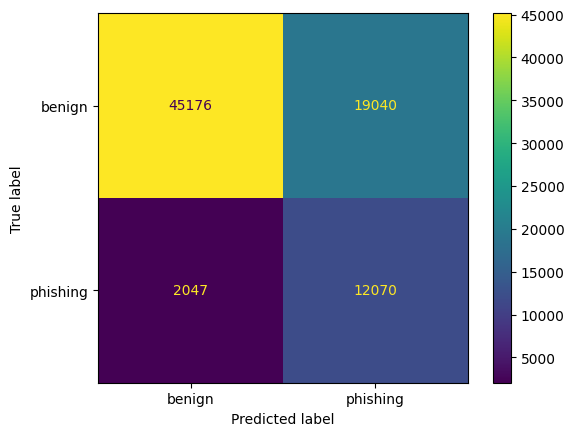

In [47]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [59]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [60]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7308031098004673, 'Precision': 0.3879781420765027, 'Recall': 0.8549975207196997, 'F1_score': 0.533751962323391}


In [61]:
df = pd.read_csv("Metrics of Dataset (Undersampling)#3.csv")

In [62]:
metrics = pd.DataFrame({"Model": "XGBoost", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [66]:
df = pd.concat([df, metrics], ignore_index=True)

In [67]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.623415,0.303641,0.842459,0.446392
1,Random Forest,0.733254,0.390210,0.853227,0.535512
2,XGBoost,0.730803,0.387978,0.854998,0.533752


In [68]:
df.to_csv("Metrics of Dataset (Undersampling)#3.csv", index=False)

In [69]:
dump(model, 'XGBoost(Undersampling) #3.joblib')

['XGBoost(Undersampling) #3.joblib']